POLYNOMIAL REGRESSION ON FUEL CONSUMPTION DATA

In [1]:
#importing needed packages
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

In [2]:
#downloading the data
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-01-09 10:23:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[=====================>]  70.93K  --.-KB/s   in 0.04s  

2019-01-09 10:23:43 (1.69 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
#reading the data
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
#selecting some features
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


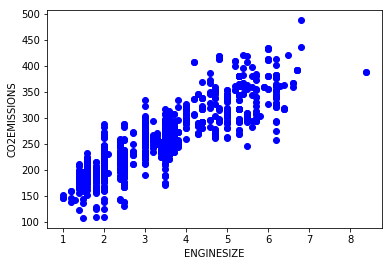

In [7]:
#plotting enginesize versus co2emissions
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [8]:
#creating train and test sets
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]

In [14]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)

In [15]:
#using train_x_poly in linear regression
clf = linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly,train_y)
print("Coeff are: ", clf.coef_)
print("Intercept is: ", clf.intercept_)

Coeff are:  [[ 0.         50.59898685 -1.57103815]]
Intercept is:  [107.45529646]


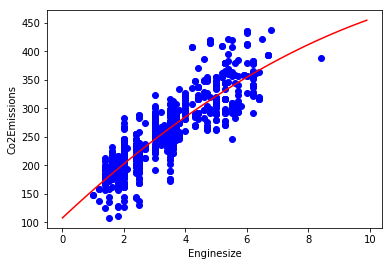

In [25]:
#plotting
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
xx = np.arange(0.0,10.0,0.1)
yy=clf.intercept_[0]+clf.coef_[0][1]*xx+clf.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy,'-r')
plt.xlabel('Enginesize')
plt.ylabel('Co2Emissions')
plt.show()